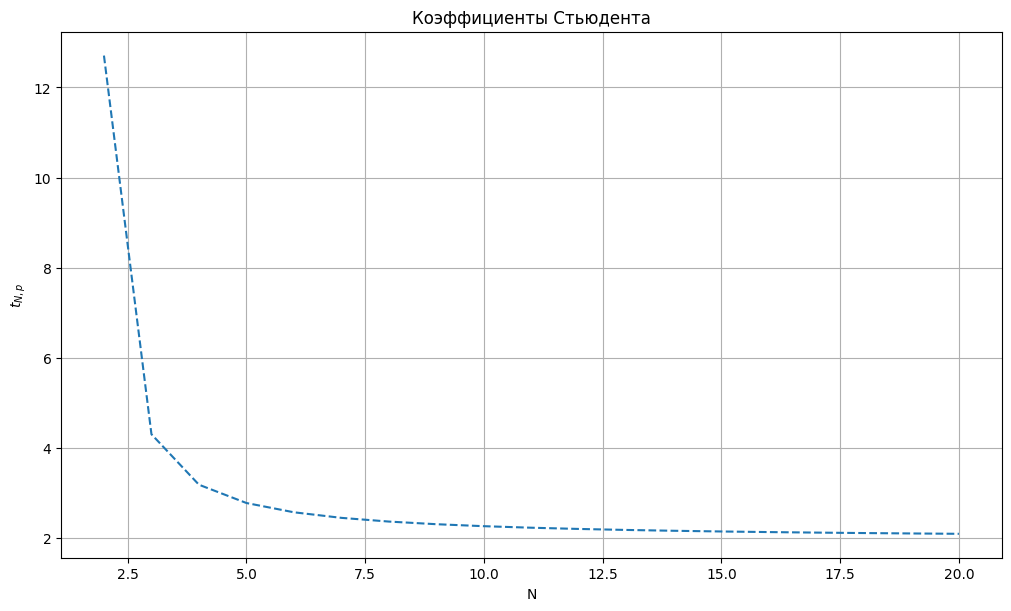

In [24]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown

# Коэффициенты Стьюдента
student = {
    2: 12.7062047364,
    3: 4.30265272991,
    4: 3.18244630528,
    5: 2.7764451052,
    6: 2.57058183661,
    7: 2.44691184879,
    8: 2.36462425101,
    9: 2.30600413503,
    10: 2.26215716274,
    11: 2.22813885196,
    12: 2.20098516008,
    13: 2.17881282966,
    14: 2.16036865646,
    15: 2.14478668792,
    16: 2.13144954556,
    17: 2.11990529922,
    18: 2.10981557783,
    19: 2.10092204024,
    20: 2.09302405441,
}


fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

x = []
y = []
for i in student:
    x.append(i)
    y.append(student[i])

ax.plot(x, y, '--')

ax.set_xlabel('N')
ax.set_ylabel(rf'$t_{{N, p}}$')
ax.set_title('Коэффициенты Стьюдента')
ax.grid(True);

In [26]:
## Вводные данные ##

fullname = 'толщины L пластины'
name = 'L' # Измеряемая величина
unit = 'мм' # Единица измерения
delta_x_pribor = 0.005 # Погрешность прибора

# Измерения
x_i = np.array([8.03, 8.02, 8.14, 8.01, 8.03, 8.01, 7.98, 7.98, 7.98, 8.00, 8.00, 8.01 ])


## Расчёты. Не трогаем. ##
display(Markdown(rf'# Обработка прямых измерений {fullname}'))

# Отображаем исходные значения
display(Markdown(rf'## 1. Отображаем исходные значения'))
display(Markdown(rf'${name}_i$ = {x_i} ${unit}$'))

# Фиксируем количество измерений
N = x_i.shape[0]
display(Markdown(rf'N = {N}'))

# Выясняем знак округления
x_round = 0
for x in x_i:
    x_i_round = len(str(x).split('.')[1])
    if x_i_round > x_round:
        x_round = x_i_round
display(Markdown(rf'Порядок округления ${name}_i$ = $10^{{{-x_round}}}$'))

# Расcчитываем среднее
display(Markdown(rf'## 2. Расcчитываем среднее'))
display(Markdown(rf''))
x_mean = round(x_i.mean(), x_round + 2)
display(Markdown(rf'${name}_{{ср}} = \frac{{\sum {{ {name}_i  }}}}{{N}} = {x_mean} {unit}$'))

# Расcчитываем отклонение от среднего
display(Markdown(rf'## 3. Расcчитываем отклонение от среднего'))
delta_x_i = x_i - x_mean
display(Markdown(rf'$\Delta {name}_i = {name}_i - {name}_{{ср}} =$ {delta_x_i} ${unit}$'))
display(Markdown(rf'$\sum \Delta {name}_i = {round(delta_x_i.sum(), x_round + 1)} {unit}$'))

# Расcчитываем квадрат отклонения для каждого измерения
display(Markdown(rf'## 4. Расcчитываем квадрат отклонение для каждого измерения и проверяем на выбросы'))
delta_x_i_2 = delta_x_i ** 2
display(Markdown(rf'$(\Delta {name}_i)^2$ = {delta_x_i_2} ${unit}^2$'))

S_i = round((delta_x_i_2.sum()/(N - 1))**0.5, x_round + 2)
display(Markdown(rf'$S_i$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N - 1}}  }} $ = {S_i} ${unit}$'))

x3_s_i = round((delta_x_i_2.sum()/(N - 1))**0.5 * 3, x_round + 2)
display(Markdown(rf'$3S_i$ = {x3_s_i} ${unit}$'))

# Проверяем наличие выбросов
count = 0
for n in range(N):
    if delta_x_i[n] > x3_s_i:
        display(Markdown(rf'Выброс: {x_i[n]}. Необходимо исключить значение.'))
        count += 1
if count == 0:
    display(Markdown(rf'Выбросов нет.'))

# Расcчитываем среднеквадратичное отклонение для всей серии измерений
display(Markdown(rf'## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений'))
S = round((delta_x_i_2.sum()/((N - 1)*N))**0.5, x_round + 2)
display(Markdown(rf'$S$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N(N - 1)}}  }} $ = {S} ${unit}$'))

# Расcчитываем случайную ошибку измерений
display(Markdown(rf'## 6. Расcчитываем случайную ошибку измерений'))
display(Markdown(rf'$t_{{N, p}}$ = {student[N]}'))

delta_x_random = round(S * student[N], x_round + 2)
display(Markdown(rf'$\Delta {name}_{{сл}}$ = $ t_{{N, p}} S $ ={delta_x_random} ${unit}$'))

# Округляем
display(Markdown(rf'## 7. Округляем'))
new_round = None
for e in range((x_round + 1) * -1, 9, 1):
    if 10 ** e >= delta_x_random:
        new_round = -e
        break
display(Markdown(rf'Новый порядок округления = $10^{{{-new_round}}}$'))
x = x + 0,5 * 10*(-new_round) if x < 0 else x - 0,5 * 10*(-new_round)
x = round(x_mean, new_round)
display(Markdown(rf'${name} = {name}_{{окр}}$ = {x} ${unit}$'))

# Рассчитываем ошибку округления
display(Markdown(rf'## 8. Рассчитываем ошибку округления'))
delta_x_round = round(x_mean - x, x_round + 2)
display(Markdown(rf'$\Delta {name}_{{окр}}$ = $ {name}_{{ср}} - {name}_{{окр}} $ = {delta_x_round} ${unit}$'))

# Расчитываем итоговую погрешность прямых измерений
display(Markdown(rf'## 9. Расчитываем итоговую погрешность прямых измерений'))
delta_x = round((delta_x_random**2 + delta_x_pribor**2 + delta_x_round**2)**0.5, x_round+1)
display(Markdown(rf'$\Delta {name}$ = $ \sqrt {{ (\Delta {name}_{{сл}})^2 + '\
                 rf'(\Delta {name}_{{окр}})^2 + (\Delta {name}_{{пр}})^2 }}$ ='\
                 rf'$\sqrt {{ {delta_x_random}^2 + {delta_x_round}^2 + {delta_x_pribor}^2}} $='
                 rf'{delta_x} ${unit}$'))

# Результат
display(Markdown(rf'## 10. Результат прямых измерений ${name}$'))
display(Markdown(rf'${name} = ({x} \pm {delta_x}) {unit}$'))

# Обработка прямых измерений толщины L пластины

## 1. Отображаем исходные значения

$L_i$ = [8.03 8.02 8.14 8.01 8.03 8.01 7.98 7.98 7.98 8.   8.   8.01] $мм$

N = 12

Порядок округления $L_i$ = $10^{-2}$

## 2. Расcчитываем среднее

$L_{ср} = \frac{\sum { L_i  }}{N} = 8.0158 мм$

## 3. Расcчитываем отклонение от среднего

$\Delta L_i = L_i - L_{ср} =$ [ 0.0142  0.0042  0.1242 -0.0058  0.0142 -0.0058 -0.0358 -0.0358 -0.0358
 -0.0158 -0.0158 -0.0058] $мм$

$\sum \Delta L_i = 0.0 мм$

## 4. Расcчитываем квадрат отклонение для каждого измерения и проверяем на выбросы

$(\Delta L_i)^2$ = [2.016400e-04 1.764000e-05 1.542564e-02 3.364000e-05 2.016400e-04
 3.364000e-05 1.281640e-03 1.281640e-03 1.281640e-03 2.496400e-04
 2.496400e-04 3.364000e-05] $мм^2$

$S_i$ = $ \sqrt { \frac{\sum { (\Delta L_i)^2 }}{ N - 1}  } $ = 0.0429 $мм$

$3S_i$ = 0.1288 $мм$

Выбросов нет.

## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений

$S$ = $ \sqrt { \frac{\sum { (\Delta L_i)^2 }}{ N(N - 1)}  } $ = 0.0124 $мм$

## 6. Расcчитываем случайную ошибку измерений

$t_{N, p}$ = 2.20098516008

$\Delta L_{сл}$ = $ t_{N, p} S $ =0.0273 $мм$

## 7. Округляем

Новый порядок округления = $10^{-1}$

$L = L_{окр}$ = 8.0 $мм$

## 8. Рассчитываем ошибку округления

$\Delta L_{окр}$ = $ L_{ср} - L_{окр} $ = 0.0158 $мм$

## 9. Расчитываем итоговую погрешность прямых измерений

$\Delta L$ = $ \sqrt { (\Delta L_{сл})^2 + (\Delta L_{окр})^2 + (\Delta L_{пр})^2 }$ =$\sqrt { 0.0273^2 + 0.0158^2 + 0.005^2} $=0.032 $мм$

## 10. Результат прямых измерений $L$

$L = (8.0 \pm 0.032) мм$

In [19]:
## Вводные данные ##

fullname = 'длины L трубки'
name = 'L' # Измеряемая величина
unit = 'мм' # Единица измерения
delta_x_pribor = 0.05 # Погрешность прибора

# Измерения
x_i = np.array([24.5, 24.6, 24.4, 24.5, 24.5 ])


## Расчёты. Не трогаем. ##
display(Markdown(rf'# Обработка прямых измерений {fullname}'))

# Отображаем исходные значения
display(Markdown(rf'## 1. Отображаем исходные значения'))
display(Markdown(rf'${name}_i$ = {x_i} ${unit}$'))

# Фиксируем количество измерений
N = x_i.shape[0]
display(Markdown(rf'N = {N}'))

# Выясняем знак округления
x_round = 0
for x in x_i:
    x_i_round = len(str(x).split('.')[1])
    if x_i_round > x_round:
        x_round = x_i_round
display(Markdown(rf'Порядок округления ${name}_i$ = $10^{{{-x_round}}}$'))
    

# Расcчитываем среднее
display(Markdown(rf'## 2. Расcчитываем среднее'))
display(Markdown(rf''))
x_mean = round(x_i.mean(), x_round + 2)
display(Markdown(rf'${name}_{{ср}} = \frac{{\sum {{ {name}_i  }}}}{{N}} = {x_mean} {unit}$'))

# Расcчитываем отклонение от среднего
display(Markdown(rf'## 3. Расcчитываем отклонение от среднего'))
delta_x_i = x_i - x_mean
display(Markdown(rf'$\Delta {name}_i = {name}_i - {name}_{{ср}} =$ {delta_x_i} ${unit}$'))
display(Markdown(rf'$\sum \Delta {name}_i = {round(delta_x_i.sum(), x_round + 1)} {unit}$'))

# Расcчитываем квадрат отклонения для каждого измерения
display(Markdown(rf'## 4. Расcчитываем квадрат отклонение для каждого измерения и проверяем на выбросы'))
delta_x_i_2 = delta_x_i ** 2
display(Markdown(rf'$(\Delta {name}_i)^2$ = {delta_x_i_2} ${unit}^2$'))

S_i = round((delta_x_i_2.sum()/(N - 1))**0.5, x_round + 2)
display(Markdown(rf'$S_i$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N - 1}}  }} $ = {S_i} ${unit}$'))

x3_s_i = round((delta_x_i_2.sum()/(N - 1))**0.5 * 3, x_round + 2)
display(Markdown(rf'$3S_i$ = {x3_s_i} ${unit}$'))

# Проверяем наличие выбросов
count = 0
for n in range(N):
    if delta_x_i[n] > x3_s_i:
        display(Markdown(rf'Выброс: {x_i[n]}. Необходимо исключить значение.'))
        count += 1
if count == 0:
    display(Markdown(rf'Выбросов нет.'))

# Расcчитываем среднеквадратичное отклонение для всей серии измерений
display(Markdown(rf'## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений'))
S = round((delta_x_i_2.sum()/((N - 1)*N))**0.5, x_round + 2)
display(Markdown(rf'$S$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N(N - 1)}}  }} $ = {S} ${unit}$'))

# Расcчитываем случайную ошибку измерений
display(Markdown(rf'## 6. Расcчитываем случайную ошибку измерений'))
display(Markdown(rf'$t_{{N, p}}$ = {student[N]}'))

delta_x_random = round(S * student[N], x_round + 2)
display(Markdown(rf'$\Delta {name}_{{сл}}$ = $ t_{{N, p}} S $ ={delta_x_random} ${unit}$'))

# Округляем
display(Markdown(rf'## 7. Округляем'))
new_round = None
for e in range((x_round + 1) * -1, 9, 1):
    if 10 ** e >= delta_x_random:
        new_round = -e
        break
display(Markdown(rf'Новый порядок округления = $10^{{{-new_round}}}$'))
x = x + 0,5 * 10*(-new_round) if x < 0 else x - 0,5 * 10*(-new_round)
x = round(x_mean, new_round)
display(Markdown(rf'${name} = {name}_{{окр}}$ = {x} ${unit}$'))

# Рассчитываем ошибку округления
display(Markdown(rf'## 8. Рассчитываем ошибку округления'))
delta_x_round = round(x_mean - x, x_round + 2)
display(Markdown(rf'$\Delta {name}_{{окр}}$ = $ {name}_{{ср}} - {name}_{{окр}} $ = {delta_x_round} ${unit}$'))

# Расчитываем итоговую погрешность прямых измерений
display(Markdown(rf'## 9. Расчитываем итоговую погрешность прямых измерений'))
delta_x = round((delta_x_random**2 + delta_x_pribor**2 + delta_x_round**2)**0.5, x_round+1)
display(Markdown(rf'$\Delta {name}$ = $ \sqrt {{ (\Delta {name}_{{сл}})^2 + '\
                 rf'(\Delta {name}_{{окр}})^2 + (\Delta {name}_{{пр}})^2 }}$ ='\
                 rf'$\sqrt {{ {delta_x_random}^2 + {delta_x_round}^2 + {delta_x_pribor}^2}} $='
                 rf'{delta_x} ${unit}$'))

# Результат
display(Markdown(rf'## 10. Результат прямых измерений ${name}$'))
display(Markdown(rf'${name} = ({x} \pm {delta_x}) {unit}$'))

# Обработка прямых измерений длины L трубки

## 1. Отображаем исходные значения

$L_i$ = [24.5 24.6 24.4 24.5 24.5] $мм$

N = 5

Порядок округления $L_i$ = $10^{-1}$

## 2. Расcчитываем среднее

$L_{ср} = \frac{\sum { L_i  }}{N} = 24.5 мм$

## 3. Расcчитываем отклонение от среднего

$\Delta L_i = L_i - L_{ср} =$ [ 0.   0.1 -0.1  0.   0. ] $мм$

$\sum \Delta L_i = 0.0 мм$

## 4. Расcчитываем квадрат отклонение для каждого измерения и проверяем на выбросы

$(\Delta L_i)^2$ = [0.   0.01 0.01 0.   0.  ] $мм^2$

$S_i$ = $ \sqrt { \frac{\sum { (\Delta L_i)^2 }}{ N - 1}  } $ = 0.071 $мм$

$3S_i$ = 0.212 $мм$

Выбросов нет.

## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений

$S$ = $ \sqrt { \frac{\sum { (\Delta L_i)^2 }}{ N(N - 1)}  } $ = 0.032 $мм$

## 6. Расcчитываем случайную ошибку измерений

$t_{N, p}$ = 2.7764451052

$\Delta L_{сл}$ = $ t_{N, p} S $ =0.089 $мм$

## 7. Округляем

Новый порядок округления = $10^{-1}$

$L = L_{окр}$ = 24.5 $мм$

## 8. Рассчитываем ошибку округления

$\Delta L_{окр}$ = $ L_{ср} - L_{окр} $ = 0.0 $мм$

## 9. Расчитываем итоговую погрешность прямых измерений

$\Delta L$ = $ \sqrt { (\Delta L_{сл})^2 + (\Delta L_{окр})^2 + (\Delta L_{пр})^2 }$ =$\sqrt { 0.089^2 + 0.0^2 + 0.05^2} $=0.1 $мм$

## 10. Результат прямых измерений $L$

$L = (24.5 \pm 0.1) мм$

In [18]:
## Вводные данные ##

fullname = 'внешнего диаметра D трубки'
name = 'D' # Измеряемая величина
unit = 'мм' # Единица измерения
delta_x_pribor = 0.05 # Погрешность прибора

# Измерения
x_i = np.array([31.3, 31.3, 31.4, 31.4, 31.3 ])


## Расчёты. Не трогаем. ##
display(Markdown(rf'# Обработка прямых измерений {fullname}'))

# Отображаем исходные значения
display(Markdown(rf'## 1. Отображаем исходные значения'))
display(Markdown(rf'${name}_i$ = {x_i} ${unit}$'))

# Фиксируем количество измерений
N = x_i.shape[0]
display(Markdown(rf'N = {N}'))

# Выясняем знак округления
x_round = 0
for x in x_i:
    x_i_round = len(str(x).split('.')[1])
    if x_i_round > x_round:
        x_round = x_i_round
display(Markdown(rf'Порядок округления ${name}_i$ = $10^{{{-x_round}}}$'))
    

# Расcчитываем среднее
display(Markdown(rf'## 2. Расcчитываем среднее'))
display(Markdown(rf''))
x_mean = round(x_i.mean(), x_round + 2)
display(Markdown(rf'${name}_{{ср}} = \frac{{\sum {{ {name}_i  }}}}{{N}} = {x_mean} {unit}$'))

# Расcчитываем отклонение от среднего
display(Markdown(rf'## 3. Расcчитываем отклонение от среднего'))
delta_x_i = x_i - x_mean
display(Markdown(rf'$\Delta {name}_i = {name}_i - {name}_{{ср}} =$ {delta_x_i} ${unit}$'))
display(Markdown(rf'$\sum \Delta {name}_i = {round(delta_x_i.sum(), x_round + 1)} {unit}$'))

# Расcчитываем квадрат отклонения для каждого измерения
display(Markdown(rf'## 4. Расcчитываем квадрат отклонение для каждого измерения и проверяем на выбросы'))
delta_x_i_2 = delta_x_i ** 2
display(Markdown(rf'$(\Delta {name}_i)^2$ = {delta_x_i_2} ${unit}^2$'))

S_i = round((delta_x_i_2.sum()/(N - 1))**0.5, x_round + 2)
display(Markdown(rf'$S_i$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N - 1}}  }} $ = {S_i} ${unit}$'))

x3_s_i = round((delta_x_i_2.sum()/(N - 1))**0.5 * 3, x_round + 2)
display(Markdown(rf'$3S_i$ = {x3_s_i} ${unit}$'))

# Проверяем наличие выбросов
count = 0
for n in range(N):
    if delta_x_i[n] > x3_s_i:
        display(Markdown(rf'Выброс: {x_i[n]}. Необходимо исключить значение.'))
        count += 1
if count == 0:
    display(Markdown(rf'Выбросов нет.'))

# Расcчитываем среднеквадратичное отклонение для всей серии измерений
display(Markdown(rf'## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений'))
S = round((delta_x_i_2.sum()/((N - 1)*N))**0.5, x_round + 2)
display(Markdown(rf'$S$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N(N - 1)}}  }} $ = {S} ${unit}$'))

# Расcчитываем случайную ошибку измерений
display(Markdown(rf'## 6. Расcчитываем случайную ошибку измерений'))
display(Markdown(rf'$t_{{N, p}}$ = {student[N]}'))

delta_x_random = round(S * student[N], x_round + 2)
display(Markdown(rf'$\Delta {name}_{{сл}}$ = $ t_{{N, p}} S $ ={delta_x_random} ${unit}$'))

# Округляем
display(Markdown(rf'## 7. Округляем'))
new_round = None
for e in range((x_round + 1) * -1, 9, 1):
    if 10 ** e >= delta_x_random:
        new_round = -e
        break
display(Markdown(rf'Новый порядок округления = $10^{{{-new_round}}}$'))
x = x + 0,5 * 10*(-new_round) if x < 0 else x - 0,5 * 10*(-new_round)
x = round(x_mean, new_round)
display(Markdown(rf'${name} = {name}_{{окр}}$ = {x} ${unit}$'))

# Рассчитываем ошибку округления
display(Markdown(rf'## 8. Рассчитываем ошибку округления'))
delta_x_round = round(x_mean - x, x_round + 2)
display(Markdown(rf'$\Delta {name}_{{окр}}$ = $ {name}_{{ср}} - {name}_{{окр}} $ = {delta_x_round} ${unit}$'))

# Расчитываем итоговую погрешность прямых измерений
display(Markdown(rf'## 9. Расчитываем итоговую погрешность прямых измерений'))
delta_x = round((delta_x_random**2 + delta_x_pribor**2 + delta_x_round**2)**0.5, x_round+1)
display(Markdown(rf'$\Delta {name}$ = $ \sqrt {{ (\Delta {name}_{{сл}})^2 + '\
                 rf'(\Delta {name}_{{окр}})^2 + (\Delta {name}_{{пр}})^2 }}$ ='\
                 rf'$\sqrt {{ {delta_x_random}^2 + {delta_x_round}^2 + {delta_x_pribor}^2}} $='
                 rf'{delta_x} ${unit}$'))

# Результат
display(Markdown(rf'## 10. Результат прямых измерений ${name}$'))
display(Markdown(rf'${name} = ({x} \pm {delta_x}) {unit}$'))

# Обработка прямых измерений внешнего диаметра D трубки

## 1. Отображаем исходные значения

$D_i$ = [31.3 31.3 31.4 31.4 31.3] $мм$

N = 5

Порядок округления $D_i$ = $10^{-1}$

## 2. Расcчитываем среднее

$D_{ср} = \frac{\sum { D_i  }}{N} = 31.34 мм$

## 3. Расcчитываем отклонение от среднего

$\Delta D_i = D_i - D_{ср} =$ [-0.04 -0.04  0.06  0.06 -0.04] $мм$

$\sum \Delta D_i = 0.0 мм$

## 4. Расcчитываем квадрат отклонение для каждого измерения и проверяем на выбросы

$(\Delta D_i)^2$ = [0.0016 0.0016 0.0036 0.0036 0.0016] $мм^2$

$S_i$ = $ \sqrt { \frac{\sum { (\Delta D_i)^2 }}{ N - 1}  } $ = 0.055 $мм$

$3S_i$ = 0.164 $мм$

Выбросов нет.

## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений

$S$ = $ \sqrt { \frac{\sum { (\Delta D_i)^2 }}{ N(N - 1)}  } $ = 0.024 $мм$

## 6. Расcчитываем случайную ошибку измерений

$t_{N, p}$ = 2.7764451052

$\Delta D_{сл}$ = $ t_{N, p} S $ =0.067 $мм$

## 7. Округляем

Новый порядок округления = $10^{-1}$

$D = D_{окр}$ = 31.3 $мм$

## 8. Рассчитываем ошибку округления

$\Delta D_{окр}$ = $ D_{ср} - D_{окр} $ = 0.04 $мм$

## 9. Расчитываем итоговую погрешность прямых измерений

$\Delta D$ = $ \sqrt { (\Delta D_{сл})^2 + (\Delta D_{окр})^2 + (\Delta D_{пр})^2 }$ =$\sqrt { 0.067^2 + 0.04^2 + 0.05^2} $=0.09 $мм$

## 10. Результат прямых измерений $D$

$D = (31.3 \pm 0.09) мм$

In [17]:
## Вводные данные ##

fullname = 'внутреннего диаметра d трубки'
name = 'd' # Измеряемая величина
unit = 'мм' # Единица измерения
delta_x_pribor = 0.05 # Погрешность прибора

# Измерения
x_i = np.array([17.9, 17.9, 17.9, 17.9, 17.9 ])

## Расчёты. Не трогаем. ##
display(Markdown(rf'# Обработка прямых измерений {fullname}'))

# Отображаем исходные значения
display(Markdown(rf'## 1. Отображаем исходные значения'))
display(Markdown(rf'${name}_i$ = {x_i} ${unit}$'))

# Фиксируем количество измерений
N = x_i.shape[0]
display(Markdown(rf'N = {N}'))

# Выясняем знак округления
x_round = 0
for x in x_i:
    x_i_round = len(str(x).split('.')[1])
    if x_i_round > x_round:
        x_round = x_i_round
display(Markdown(rf'Порядок округления ${name}_i$ = $10^{{{-x_round}}}$'))
    

# Расcчитываем среднее
display(Markdown(rf'## 2. Расcчитываем среднее'))
display(Markdown(rf''))
x_mean = round(x_i.mean(), x_round + 2)
display(Markdown(rf'${name}_{{ср}} = \frac{{\sum {{ {name}_i  }}}}{{N}} = {x_mean} {unit}$'))

# Расcчитываем отклонение от среднего
display(Markdown(rf'## 3. Расcчитываем отклонение от среднего'))
delta_x_i = x_i - x_mean
display(Markdown(rf'$\Delta {name}_i = {name}_i - {name}_{{ср}} =$ {delta_x_i} ${unit}$'))
display(Markdown(rf'$\sum \Delta {name}_i = {round(delta_x_i.sum(), x_round + 1)} {unit}$'))

# Расcчитываем квадрат отклонения для каждого измерения
display(Markdown(rf'## 4. Расcчитываем квадрат отклонение для каждого измерения и проверяем на выбросы'))
delta_x_i_2 = delta_x_i ** 2
display(Markdown(rf'$(\Delta {name}_i)^2$ = {delta_x_i_2} ${unit}^2$'))

S_i = round((delta_x_i_2.sum()/(N - 1))**0.5, x_round + 2)
display(Markdown(rf'$S_i$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N - 1}}  }} $ = {S_i} ${unit}$'))

x3_s_i = round((delta_x_i_2.sum()/(N - 1))**0.5 * 3, x_round + 2)
display(Markdown(rf'$3S_i$ = {x3_s_i} ${unit}$'))

# Проверяем наличие выбросов
count = 0
for n in range(N):
    if delta_x_i[n] > x3_s_i:
        display(Markdown(rf'Выброс: {x_i[n]}. Необходимо исключить значение.'))
        count += 1
if count == 0:
    display(Markdown(rf'Выбросов нет.'))

# Расcчитываем среднеквадратичное отклонение для всей серии измерений
display(Markdown(rf'## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений'))
S = round((delta_x_i_2.sum()/((N - 1)*N))**0.5, x_round + 2)
display(Markdown(rf'$S$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N(N - 1)}}  }} $ = {S} ${unit}$'))

# Расcчитываем случайную ошибку измерений
display(Markdown(rf'## 6. Расcчитываем случайную ошибку измерений'))
display(Markdown(rf'$t_{{N, p}}$ = {student[N]}'))

delta_x_random = round(S * student[N], x_round + 2)
display(Markdown(rf'$\Delta {name}_{{сл}}$ = $ t_{{N, p}} S $ ={delta_x_random} ${unit}$'))

# Округляем
display(Markdown(rf'## 7. Округляем'))
new_round = None
for e in range((x_round + 1) * -1, 9, 1):
    if 10 ** e >= delta_x_random:
        new_round = -e
        break
display(Markdown(rf'Новый порядок округления = $10^{{{-new_round}}}$'))
x = x + 0,5 * 10*(-new_round) if x < 0 else x - 0,5 * 10*(-new_round)
x = round(x_mean, new_round)
display(Markdown(rf'${name} = {name}_{{окр}}$ = {x} ${unit}$'))

# Рассчитываем ошибку округления
display(Markdown(rf'## 8. Рассчитываем ошибку округления'))
delta_x_round = round(x_mean - x, x_round + 2)
display(Markdown(rf'$\Delta {name}_{{окр}}$ = $ {name}_{{ср}} - {name}_{{окр}} $ = {delta_x_round} ${unit}$'))

# Расчитываем итоговую погрешность прямых измерений
display(Markdown(rf'## 9. Расчитываем итоговую погрешность прямых измерений'))
delta_x = round((delta_x_random**2 + delta_x_pribor**2 + delta_x_round**2)**0.5, x_round+1)
display(Markdown(rf'$\Delta {name}$ = $ \sqrt {{ (\Delta {name}_{{сл}})^2 + '\
                 rf'(\Delta {name}_{{окр}})^2 + (\Delta {name}_{{пр}})^2 }}$ ='\
                 rf'$\sqrt {{ {delta_x_random}^2 + {delta_x_round}^2 + {delta_x_pribor}^2}} $='
                 rf'{delta_x} ${unit}$'))

# Результат
display(Markdown(rf'## 10. Результат прямых измерений ${name}$'))
display(Markdown(rf'${name} = ({x} \pm {delta_x}) {unit}$'))

# Обработка прямых измерений внутреннего диаметра d трубки

## 1. Отображаем исходные значения

$d_i$ = [17.9 17.9 17.9 17.9 17.9] $мм$

N = 5

Порядок округления $d_i$ = $10^{-1}$

## 2. Расcчитываем среднее

$d_{ср} = \frac{\sum { d_i  }}{N} = 17.9 мм$

## 3. Расcчитываем отклонение от среднего

$\Delta d_i = d_i - d_{ср} =$ [0. 0. 0. 0. 0.] $мм$

$\sum \Delta d_i = 0.0 мм$

## 4. Расcчитываем квадрат отклонение для каждого измерения и проверяем на выбросы

$(\Delta d_i)^2$ = [0. 0. 0. 0. 0.] $мм^2$

$S_i$ = $ \sqrt { \frac{\sum { (\Delta d_i)^2 }}{ N - 1}  } $ = 0.0 $мм$

$3S_i$ = 0.0 $мм$

Выбросов нет.

## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений

$S$ = $ \sqrt { \frac{\sum { (\Delta d_i)^2 }}{ N(N - 1)}  } $ = 0.0 $мм$

## 6. Расcчитываем случайную ошибку измерений

$t_{N, p}$ = 2.7764451052

$\Delta d_{сл}$ = $ t_{N, p} S $ =0.0 $мм$

## 7. Округляем

Новый порядок округления = $10^{-2}$

$d = d_{окр}$ = 17.9 $мм$

## 8. Рассчитываем ошибку округления

$\Delta d_{окр}$ = $ d_{ср} - d_{окр} $ = 0.0 $мм$

## 9. Расчитываем итоговую погрешность прямых измерений

$\Delta d$ = $ \sqrt { (\Delta d_{сл})^2 + (\Delta d_{окр})^2 + (\Delta d_{пр})^2 }$ =$\sqrt { 0.0^2 + 0.0^2 + 0.05^2} $=0.05 $мм$

## 10. Результат прямых измерений $d$

$d = (17.9 \pm 0.05) мм$

In [16]:
## Вводные данные ##

fullname = 'массы m трубки'
name = 'm' # Измеряемая величина
unit = 'г' # Единица измерения
delta_x_pribor = 0.01 # Погрешность прибора

# Измерения
x_i = np.array([98.01, 98.00, 98.00, 98.00, 98.01 ])

## Расчёты. Не трогаем. ##
display(Markdown(rf'# Обработка прямых измерений {fullname}'))

# Отображаем исходные значения
display(Markdown(rf'## 1. Отображаем исходные значения'))
display(Markdown(rf'${name}_i$ = {x_i} ${unit}$'))

# Фиксируем количество измерений
N = x_i.shape[0]
display(Markdown(rf'N = {N}'))

# Выясняем знак округления
x_round = 0
for x in x_i:
    x_i_round = len(str(x).split('.')[1])
    if x_i_round > x_round:
        x_round = x_i_round
display(Markdown(rf'Порядок округления ${name}_i$ = $10^{{{-x_round}}}$'))
    

# Расcчитываем среднее
display(Markdown(rf'## 2. Расcчитываем среднее'))
display(Markdown(rf''))
x_mean = round(x_i.mean(), x_round + 2)
display(Markdown(rf'${name}_{{ср}} = \frac{{\sum {{ {name}_i  }}}}{{N}} = {x_mean} {unit}$'))

# Расcчитываем отклонение от среднего
display(Markdown(rf'## 3. Расcчитываем отклонение от среднего'))
delta_x_i = x_i - x_mean
display(Markdown(rf'$\Delta {name}_i = {name}_i - {name}_{{ср}} =$ {delta_x_i} ${unit}$'))
display(Markdown(rf'$\sum \Delta {name}_i = {round(delta_x_i.sum(), x_round + 1)} {unit}$'))

# Расcчитываем квадрат отклонения для каждого измерения
display(Markdown(rf'## 4. Расcчитываем квадрат отклонение для каждого измерения и проверяем на выбросы'))
delta_x_i_2 = delta_x_i ** 2
display(Markdown(rf'$(\Delta {name}_i)^2$ = {delta_x_i_2} ${unit}^2$'))

S_i = round((delta_x_i_2.sum()/(N - 1))**0.5, x_round + 2)
display(Markdown(rf'$S_i$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N - 1}}  }} $ = {S_i} ${unit}$'))

x3_s_i = round((delta_x_i_2.sum()/(N - 1))**0.5 * 3, x_round + 2)
display(Markdown(rf'$3S_i$ = {x3_s_i} ${unit}$'))

# Проверяем наличие выбросов
count = 0
for n in range(N):
    if delta_x_i[n] > x3_s_i:
        display(Markdown(rf'Выброс: {x_i[n]}. Необходимо исключить значение.'))
        count += 1
if count == 0:
    display(Markdown(rf'Выбросов нет.'))

# Расcчитываем среднеквадратичное отклонение для всей серии измерений
display(Markdown(rf'## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений'))
S = round((delta_x_i_2.sum()/((N - 1)*N))**0.5, x_round + 2)
display(Markdown(rf'$S$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N(N - 1)}}  }} $ = {S} ${unit}$'))

# Расcчитываем случайную ошибку измерений
display(Markdown(rf'## 6. Расcчитываем случайную ошибку измерений'))
display(Markdown(rf'$t_{{N, p}}$ = {student[N]}'))

delta_x_random = round(S * student[N], x_round + 2)
display(Markdown(rf'$\Delta {name}_{{сл}}$ = $ t_{{N, p}} S $ ={delta_x_random} ${unit}$'))

# Округляем
display(Markdown(rf'## 7. Округляем'))
new_round = None
for e in range((x_round + 1) * -1, 9, 1):
    if 10 ** e >= delta_x_random:
        new_round = -e
        break
display(Markdown(rf'Новый порядок округления = $10^{{{-new_round}}}$'))
x = x + 0,5 * 10*(-new_round) if x < 0 else x - 0,5 * 10*(-new_round)
x = round(x_mean, new_round)
display(Markdown(rf'${name} = {name}_{{окр}}$ = {x} ${unit}$'))

# Рассчитываем ошибку округления
display(Markdown(rf'## 8. Рассчитываем ошибку округления'))
delta_x_round = round(x_mean - x, x_round + 2)
display(Markdown(rf'$\Delta {name}_{{окр}}$ = $ {name}_{{ср}} - {name}_{{окр}} $ = {delta_x_round} ${unit}$'))

# Расчитываем итоговую погрешность прямых измерений
display(Markdown(rf'## 9. Расчитываем итоговую погрешность прямых измерений'))
delta_x = round((delta_x_random**2 + delta_x_pribor**2 + delta_x_round**2)**0.5, x_round+1)
display(Markdown(rf'$\Delta {name}$ = $ \sqrt {{ (\Delta {name}_{{сл}})^2 + '\
                 rf'(\Delta {name}_{{окр}})^2 + (\Delta {name}_{{пр}})^2 }}$ ='\
                 rf'$\sqrt {{ {delta_x_random}^2 + {delta_x_round}^2 + {delta_x_pribor}^2}} $='
                 rf'{delta_x} ${unit}$'))

# Результат
display(Markdown(rf'## 10. Результат прямых измерений ${name}$'))
display(Markdown(rf'${name} = ({x} \pm {delta_x}) {unit}$'))

# Обработка прямых измерений массы m трубки

## 1. Отображаем исходные значения

$m_i$ = [98.01 98.   98.   98.   98.01] $г$

N = 5

Порядок округления $m_i$ = $10^{-2}$

## 2. Расcчитываем среднее

$m_{ср} = \frac{\sum { m_i  }}{N} = 98.004 г$

## 3. Расcчитываем отклонение от среднего

$\Delta m_i = m_i - m_{ср} =$ [ 0.006 -0.004 -0.004 -0.004  0.006] $г$

$\sum \Delta m_i = -0.0 г$

## 4. Расcчитываем квадрат отклонение для каждого измерения и проверяем на выбросы

$(\Delta m_i)^2$ = [3.6e-05 1.6e-05 1.6e-05 1.6e-05 3.6e-05] $г^2$

$S_i$ = $ \sqrt { \frac{\sum { (\Delta m_i)^2 }}{ N - 1}  } $ = 0.0055 $г$

$3S_i$ = 0.0164 $г$

Выбросов нет.

## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений

$S$ = $ \sqrt { \frac{\sum { (\Delta m_i)^2 }}{ N(N - 1)}  } $ = 0.0024 $г$

## 6. Расcчитываем случайную ошибку измерений

$t_{N, p}$ = 2.7764451052

$\Delta m_{сл}$ = $ t_{N, p} S $ =0.0067 $г$

## 7. Округляем

Новый порядок округления = $10^{-2}$

$m = m_{окр}$ = 98.0 $г$

## 8. Рассчитываем ошибку округления

$\Delta m_{окр}$ = $ m_{ср} - m_{окр} $ = 0.004 $г$

## 9. Расчитываем итоговую погрешность прямых измерений

$\Delta m$ = $ \sqrt { (\Delta m_{сл})^2 + (\Delta m_{окр})^2 + (\Delta m_{пр})^2 }$ =$\sqrt { 0.0067^2 + 0.004^2 + 0.01^2} $=0.013 $г$

## 10. Результат прямых измерений $m$

$m = (98.0 \pm 0.013) г$